# Cell 1: Importing Libraries and Setting Up Data
## Explanation
This cell imports the necessary libraries and sets up the data for analysis. 
It generates a dataset with a combination of normal and outlier income values, 
assigns random weights, and creates a DataFrame. Additionally, it calculates the mode, mean, and median of the income data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Generate random income data
np.random.seed(0)
income_normal = np.random.normal(50000, 15000, 1000)
income_outliers = np.random.normal(100000, 5000, 50)
income_data = np.concatenate([income_normal, income_outliers])
weights = np.random.uniform(1, 10, len(income_data))

# Create DataFrame
df = pd.DataFrame({'Income': income_data, 'Weight': weights})
mode_income = df['Income'].mode()[0]
mean_income = df['Income'].mean()
median_income = df['Income'].median()


# Cell 2: Normality Check with Q-Q Plot
## Explanation
In this cell, we create a histogram combined with a kernel density estimate (KDE) 
to visually assess the distribution of the income data. 
The histogram displays the frequency of income values, and the KDE line estimates the probability density function. 
Vertical lines indicate the mean, median, and mode, allowing for quick visual comparison.
This visualization helps determine if the income distribution resembles a normal distribution.


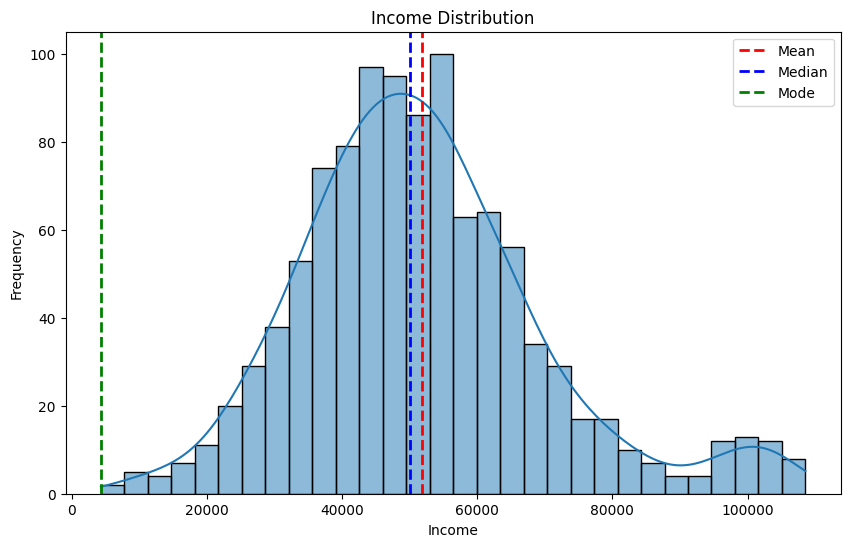

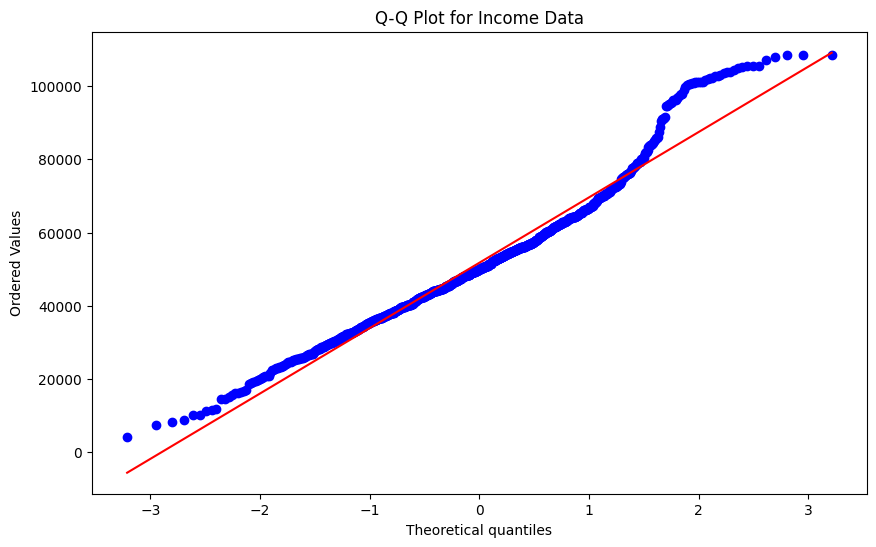

In [2]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=30, kde=True)
plt.axvline(mean_income, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median_income, color='blue', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mode_income, color='green', linestyle='dashed', linewidth=2, label='Mode')
plt.legend()
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# Q-Q Plot
plt.figure(figsize=(10, 6))
stats.probplot(df['Income'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Income Data')
plt.show()


# Cell 3: Box Plot of Income Distribution without Weighting or Trimming
## Explanation
This cell creates a box plot to visualize the income distribution without applying any weighting or trimming. 
It includes lines indicating the mode, mean, and median values, as well as a legend explaining the outliers.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


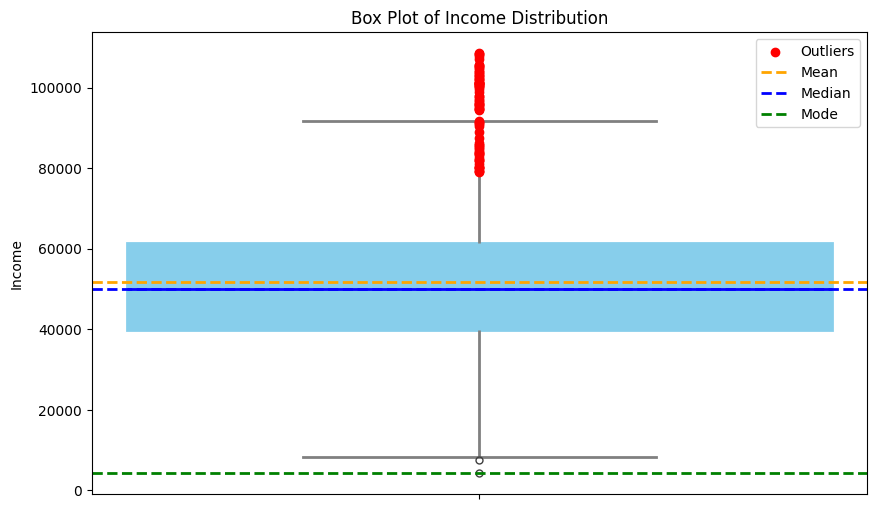

In [3]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Income'], fliersize=5, linewidth=2, 
            boxprops=dict(color='skyblue'), medianprops=dict(color='blue'), 
            whiskerprops=dict(color='gray'), capprops=dict(color='gray'))

# Personaliza los outliers para que sean rojos
outliers = df['Income'][df['Income'] > (mean_income + 1.5 * df['Income'].std())]  # Define outliers
plt.scatter(y=outliers, x=[0]*len(outliers), color='red', label='Outliers', zorder=5)  # Dibuja outliers en rojo

plt.axhline(mean_income, color='orange', linestyle='dashed', linewidth=2, label='Mean')  # Cambiar color de mean
plt.axhline(median_income, color='blue', linestyle='dashed', linewidth=2, label='Median')
plt.axhline(mode_income, color='green', linestyle='dashed', linewidth=2, label='Mode')
plt.legend()
plt.title('Box Plot of Income Distribution')
plt.ylabel('Income')
plt.show()


# Cell 4: Box Plot of Income Distribution with Weights Applied
## Explanation
This cell generates a box plot for the income distribution with weights applied. 
It calculates and displays the weighted mean along with the median, providing insights into the impact of weighting on the data visualization.


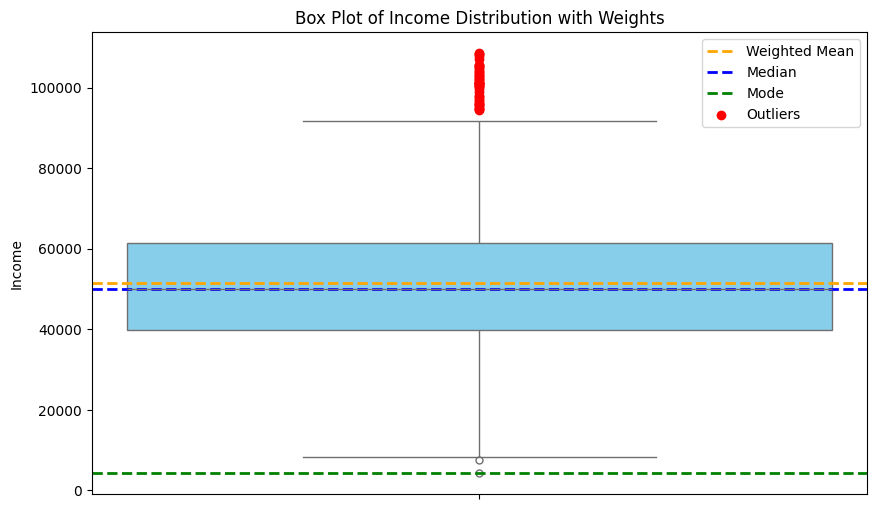

In [4]:
# Calcular el ingreso ponderado
weighted_mean = np.average(df['Income'], weights=df['Weight'])

# Calcular la moda
mode_income = df['Income'].mode()[0]

plt.figure(figsize=(10, 6))
# Graficar el box plot con la columna de ingresos
sns.boxplot(y=df['Income'], fliersize=5, color='skyblue', boxprops=dict(facecolor='skyblue'))

# Agregar líneas para las estadísticas
plt.axhline(weighted_mean, color='orange', linestyle='dashed', linewidth=2, label='Weighted Mean')
plt.axhline(median_income, color='blue', linestyle='dashed', linewidth=2, label='Median')
plt.axhline(mode_income, color='green', linestyle='dashed', linewidth=2, label='Mode')

# Calcular y personalizar los outliers
outliers = df['Income'][df['Income'] > (df['Income'].quantile(0.75) + 1.5 * (df['Income'].quantile(0.75) - df['Income'].quantile(0.25)))]

plt.scatter(np.zeros(len(outliers)), outliers, color='red', label='Outliers', zorder=5)

plt.legend()
plt.title('Box Plot of Income Distribution with Weights')
plt.ylabel('Income')
plt.show()


# Cell 5: Box Plot of Income Distribution with Median and MAD
## Explanation
This cell creates a box plot displaying the median and the median absolute deviation (MAD) of the income data. 
MAD is a robust statistical measure that quantifies the dispersion of a dataset by calculating the median of the absolute deviations from the median.
This plot highlights the presence and effect of outliers on the income distribution.


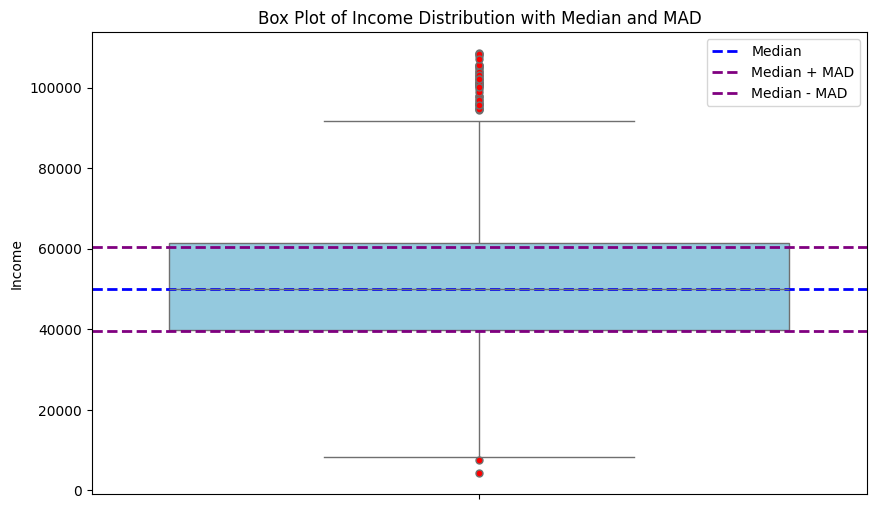

In [5]:
# Calcular la mediana y el MAD
median_income = df['Income'].median()
mad_income = np.median(np.abs(df['Income'] - median_income))

plt.figure(figsize=(10, 6))
# Graficar el box plot vertical con color skyblue y outliers en rojo
sns.boxplot(y=df['Income'], color='skyblue', flierprops=dict(marker='o', markerfacecolor='red', markersize=5))

# Agregar líneas para la mediana y MAD
plt.axhline(median_income, color='blue', linestyle='dashed', linewidth=2, label='Median')
plt.axhline(median_income + mad_income, color='purple', linestyle='dashed', linewidth=2, label='Median + MAD')
plt.axhline(median_income - mad_income, color='purple', linestyle='dashed', linewidth=2, label='Median - MAD')

plt.legend()
plt.title('Box Plot of Income Distribution with Median and MAD')
plt.ylabel('Income')
plt.show()


# Cell 6: Box Plot of Trimmed Income Distribution
## Explanation
This cell applies a 5% trimming to the income data, creating a box plot of the trimmed distribution. 
It includes lines indicating the 5th and 95th percentiles, providing clarity on the trimming effect on the dataset.


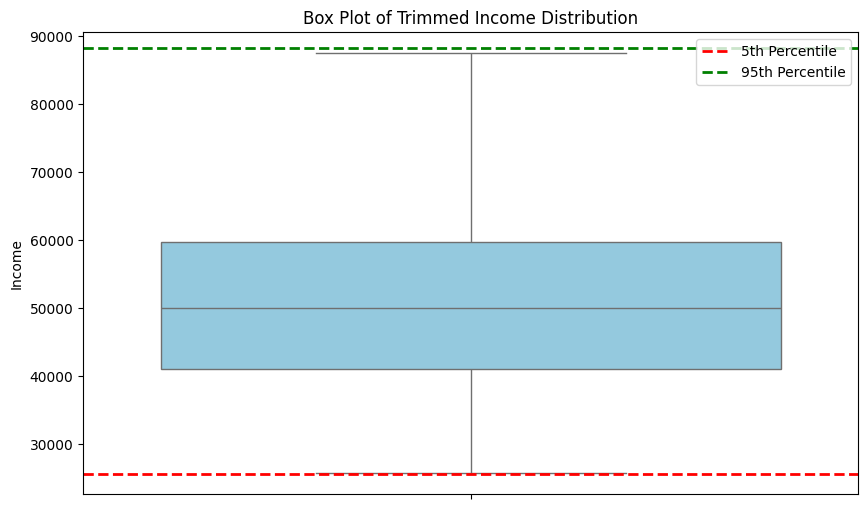

In [6]:
# Calcular los percentiles para el recorte
trim_low = df['Income'].quantile(0.05)
trim_high = df['Income'].quantile(0.95)
trimmed_df = df[(df['Income'] >= trim_low) & (df['Income'] <= trim_high)]

plt.figure(figsize=(10, 6))
# Graficar el box plot vertical con color skyblue y outliers en rojo
sns.boxplot(y=trimmed_df['Income'], color='skyblue', flierprops=dict(marker='o', markerfacecolor='red', markersize=5))

# Agregar líneas para los percentiles
plt.axhline(trim_low, color='red', linestyle='dashed', linewidth=2, label='5th Percentile')
plt.axhline(trim_high, color='green', linestyle='dashed', linewidth=2, label='95th Percentile')

plt.legend()
plt.title('Box Plot of Trimmed Income Distribution')
plt.ylabel('Income')
plt.show()


# Cell 7: Clustering the Income Data
## Explanation
In this cell, we apply K-Means clustering to the income data. 
We choose 3 clusters for simplicity and visualize the cluster assignments by adding a new column to the DataFrame. 
This will help us analyze the different groups within the income data.


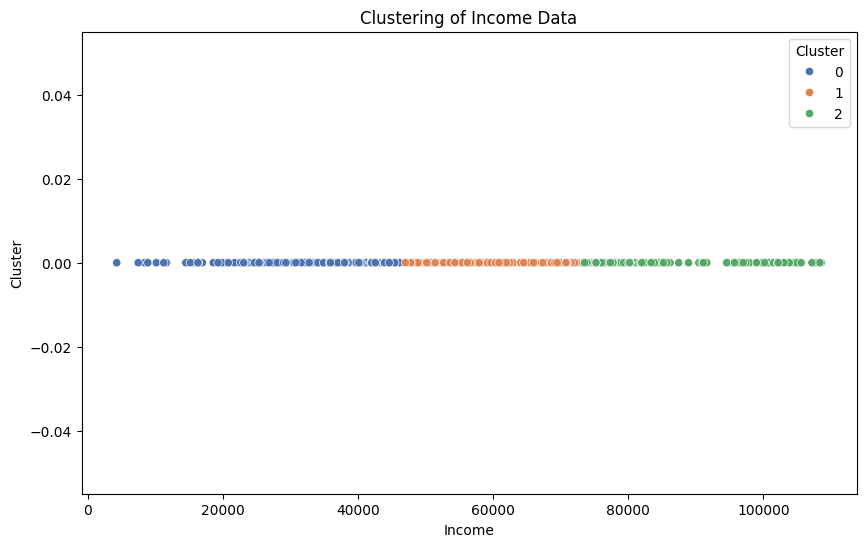

In [7]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Aplicar KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(df[['Income']])

# Definir una paleta de colores
palette = sns.color_palette('deep', n_colors=3)

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Income'], y=np.zeros_like(df['Income']), hue=df['Cluster'], palette=palette)
plt.title('Clustering of Income Data')
plt.xlabel('Income')
plt.ylabel('Cluster')
plt.legend(title='Cluster')
plt.show()



# Cell 8: Histogram of Clusters
## Explanation
This cell generates a histogram to visualize the distribution of income data across the different clusters identified by K-Means. 
Each cluster is represented with a different color, providing insights into the income distribution and how it varies among the clusters.


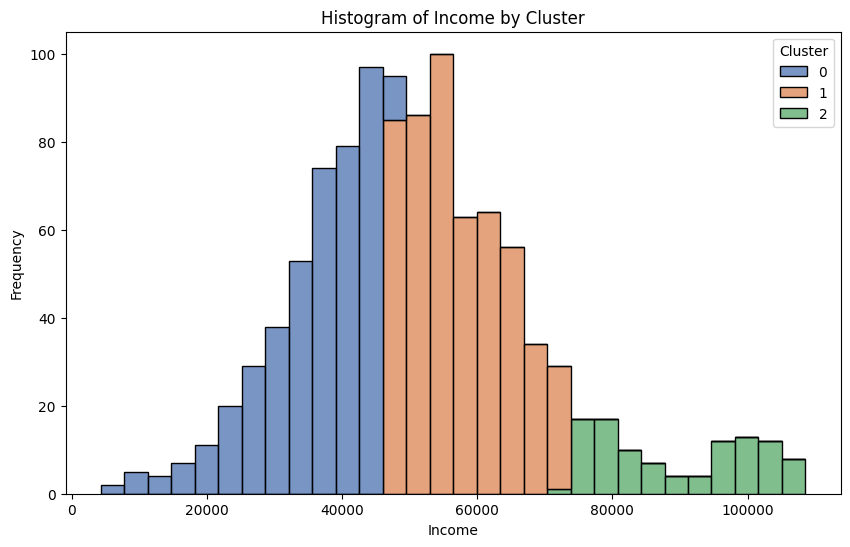

In [8]:
# Histograma con la misma paleta
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Income', hue='Cluster', multiple='stack', bins=30, palette=palette)
plt.title('Histogram of Income by Cluster')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# Cell 9: Clean Clusters to Achieve Uniform Histogram
## Explanation
In this cell, we remove outliers from each cluster based on the IQR (Interquartile Range) method. 
This helps to achieve a more uniform distribution in the histogram.


In [9]:
# Remove outliers based on IQR
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    Q1 = cluster_data['Income'].quantile(0.25)
    Q3 = cluster_data['Income'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df['Cluster'] != cluster) | ((df['Income'] >= lower_bound) & (df['Income'] <= upper_bound))]


# Cell 10: Uniform Histogram of Cleaned Clusters
## Explanation
This cell generates a histogram of the cleaned income data, removing outliers to achieve a more uniform distribution.


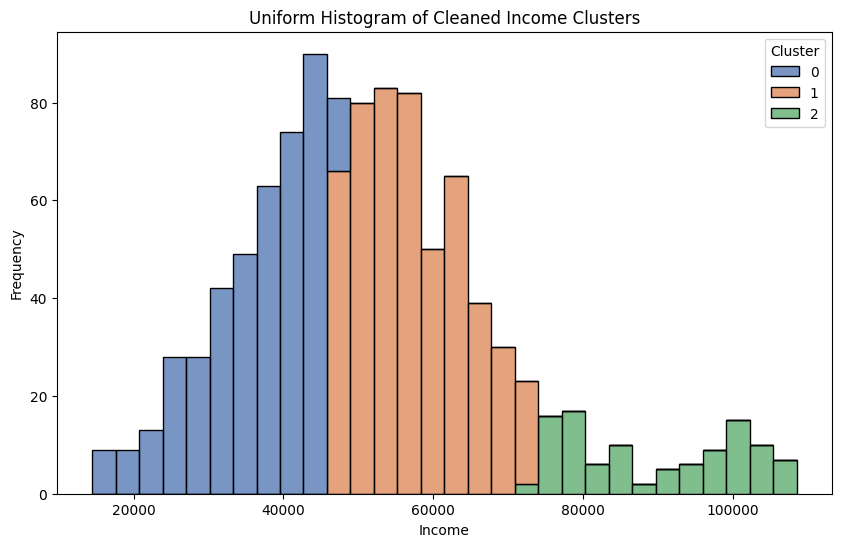

In [10]:
# Definir una paleta de colores
palette = sns.color_palette('deep', n_colors=3)

# Histograma con la misma paleta
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Income', hue='Cluster', multiple='stack', bins=30, palette=palette)
plt.title('Uniform Histogram of Cleaned Income Clusters')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


# Cell 11: Box Plot of Income by Cluster
## Explanation
In this cell, we create box plots for each cluster to visualize the distribution of income and identify the median and outliers.


/var/folders/kc/fprg47md0p36ch019m6frj0w0000gn/T/ipykernel_23845/3276174690.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Income', data=df, palette=palette)


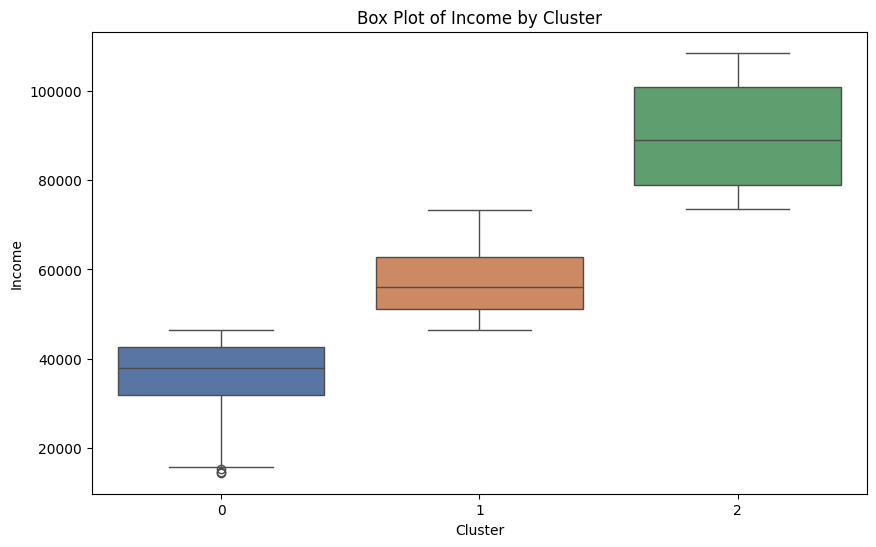

In [11]:
# Definir una paleta de colores
palette = sns.color_palette('deep', n_colors=3)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Income', data=df, palette=palette)
plt.title('Box Plot of Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.show()


# Cell 12: DataFrames by Cluster
## Explanation
In this section, we will create separate DataFrames for each cluster, allowing for further analysis and visualization specific to each income group.


In [12]:
cluster_dfs = {cluster: df[df['Cluster'] == cluster] for cluster in df['Cluster'].unique()}

# Example: Display DataFrame for Cluster 0
print(cluster_dfs[0])


           Income    Weight  Cluster
5    35340.831802  5.000311        0
19   37188.563910  9.868407        0
23   38867.524694  4.289851        0
25   28184.514881  5.384333        0
32   36683.213786  2.801709        0
..            ...       ...      ...
986  43910.874092  5.307183        0
989  45453.526199  3.089888        0
992  38008.664007  4.250021        0
998  32785.835827  9.500267        0
999  44628.288868  7.555411        0

[420 rows x 3 columns]


In [13]:
cluster_dfs = {cluster: df[df['Cluster'] == cluster] for cluster in df['Cluster'].unique()}

# Example: Display DataFrame for Cluster 1
print(cluster_dfs[1])


           Income    Weight  Cluster
1    56002.358126  3.468661        1
2    64681.069762  7.316564        1
6    64251.326263  5.521540        1
7    47729.641876  5.860432        1
8    48451.717223  6.809899        1
..            ...       ...      ...
993  53611.812646  1.907241        1
994  54336.807579  4.238288        1
995  56193.062307  8.990785        1
996  47024.016548  3.687309        1
997  51412.884505  4.347413        1

[516 rows x 3 columns]


In [14]:
cluster_dfs = {cluster: df[df['Cluster'] == cluster] for cluster in df['Cluster'].unique()}

# Example: Display DataFrame for Cluster 2
print(cluster_dfs[2])


             Income    Weight  Cluster
0      76460.785190  2.978747        2
3      83613.397988  1.271735        2
4      78013.369852  8.859875        2
24     84046.319360  2.811401        2
43     79261.630928  1.916692        2
...             ...       ...      ...
1045  102091.990057  9.047553        2
1046  102177.730796  2.629375        2
1047   97003.878613  7.873722        2
1048  100165.448756  1.552110        2
1049   95729.193696  5.164851        2

[105 rows x 3 columns]
